# Phase1 Project: Aviation Accidents Data Analysis and Insights

## Overview
The project seeks to explore data on different airplanes accidents in order to advise company stakeholders on which type of airplane to choose for business as they would like to join this industry. The dataset is from kaggle and it contains information covering United States, its territories and international waters from 1962 and later on selected incidents.

## Business
The company is seeking to start a new business endeavor, operating airplanes for commercial and private enterprises, in which they are novice to it. The stakeholders are seeking to understand what type of aircrafts have low risk to accidents from prevoius occurences. 

The dataset has various incidents since 1962. The information on the database is on continual update once an incident happens. Using this data would help identify the patterns/trends on these occurences. 

At the end of the data analysis, getting airplanes types which have minimal or no accidents and any other factors that may affect the purchase, this would make the best fit for recommendation thus aid in making decisions on which type of airplane to purchase.


## Data
Let's check what the data is about. We will use python methods and its libraries to explore the data.

In [431]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [335]:
#Open and reeding the datasets
aviation_df = pd.read_csv("AviationData.csv", encoding='cp1252')
usstate_df = pd.read_csv("USState_Codes.csv", encoding='cp1252')

c:\Users\amerc\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [336]:
#get top 5 rows of aviation data
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


From the first five records, we see that there are some null values.

In [337]:
# Get the shape of the data, rows and columns
aviation_df.shape

(88889, 31)

In [338]:
#get information about the data, including the datatypes of respective columns
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [339]:
aviation_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


From the above data, we can see aviation dataset has 88,889 rows with 35 columns. It gives info on airplane type, location, country where the incident occured, information about the airplane, dates, etc.

There are missing data from the null values seen in the data. The dataset has numbers on injuries - fatal, seroius or minor ones, and number of engines of the airplane.

In [340]:
##get top 5 rows of USState Codes data
usstate_df.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [341]:
usstate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [342]:
usstate_df.shape

(62, 2)

In [343]:
#Check the columns in the aviation publish_display_data
aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [344]:
usstate_df.value_counts() #

US_State       Abbreviation
Wyoming        WY              1
Idaho          ID              1
Minnesota      MN              1
Micronesia     FM              1
Michigan       MI              1
                              ..
New Mexico     NM              1
New Jersey     NJ              1
New Hampshire  NH              1
Nevada         NV              1
Alabama        AL              1
Length: 62, dtype: int64

In [345]:
usstate_df.isna().sum()

US_State        0
Abbreviation    0
dtype: int64

The data from USState codes contains 62 rows, showing 62 states and 2 columns showing the States involved and the respective codes.
There are no null values

In [346]:
#let us check if the data has columns that have similar content on both aviation and usstate codes
usstate_df['US_State'].isin(aviation_df['Country']).value_counts()


False    54
True      8
Name: US_State, dtype: int64

## Data Preparation
Let us prepare the data for analysis. This will/may involve handling missing values in the data, dropping unnecessary columns, selecting needed data, etc.

We start by checking the essential columns and dropping the unnecessary ones.

1. The company needs 'Airplane'. If you check the AircraftCategory, there are aircraft of the Airplane Category. So we will create a dataset of that category.

2. To determine the low risk aircraft, it needs specific kind of data such as the model, make, category, engine type, level of damage, number of injuries, etc.
Columns such as Event Id, Investigation Type, Accident Number, etc. may not be useful. So we will drop these columns

3. The data may be having spaces at the edges, we will strip the empty spaces in case the are present.

4. Then we rename the columns to be easy handling by removing dots on column names 

5. Check null values and see how to handle them, drop, replace by mode , mean or median.
As noticed earlier, there are only 4 columns without null values in the aviation data i.e.:

        1. 'Event.Id' 
        2. 'Investigation.Type'
        3. 'Accident.Number'
        4. 'Event.Date'

In [347]:
#First let us make a copy of the data
aviation_df_copy = aviation_df.copy(deep=True)

In [348]:
#Checking the columns of aviation data
aviation_df_copy.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [349]:
#Check Aircraft Category
aviation_df_copy['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [370]:
import numpy as np
#creating Airplane dataset
airplane_df = aviation_df_copy.loc[aviation_df_copy["Aircraft.Category"] == "Airplane"]
airplane_df.set_index(keys=np.arange(1, len(airplane_df)+1))#reset_index()
airplane_df.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.4453,-70.7583,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


In [371]:
#droping columns
airplane_df.drop(["Event.Id","Investigation.Type", "Accident.Number", "Airport.Code", "Airport.Name", "Air.carrier", "Schedule", "Report.Status", "Publication.Date"], axis=1,inplace = True)
#airplane_df.head()

c:\Users\amerc\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [372]:
airplane_df.tail()

,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,...,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
88869,2022-12-13,"Lewistown, MT",United States,047257N,0109280W,Non-Fatal,Substantial,Airplane,C-GZPU,PIPER,...,2.0,NaN,NUSC,NaN,0.0,0.0,0.0,1.0,NaN,NaN
88873,2022-12-14,"San Juan, PR",United States,182724N,0066554W,Non-Fatal,Substantial,Airplane,N416PC,CIRRUS DESIGN CORP,...,1.0,NaN,091,Personal,0.0,0.0,0.0,1.0,VMC,NaN
88876,2022-12-15,"Wichita, KS",United States,373829N,0972635W,Non-Fatal,Substantial,Airplane,N398KL,SWEARINGEN,...,2.0,NaN,135,NaN,0.0,0.0,0.0,1.0,NaN,NaN
88877,2022-12-16,"Brooksville, FL",United States,282825N,0822719W,Minor,Substantial,Airplane,N5405V,CESSNA,...,1.0,NaN,091,Personal,0.0,1.0,0.0,0.0,VMC,NaN
88886,2022-12-26,"Payson, AZ",United States,341525N,1112021W,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,...,1.0,NaN,091,Personal,0.0,0.0,0.0,1.0,VMC,NaN


In [373]:
airplane_df.columns

Index(['Event.Date', 'Location', 'Country', 'Latitude', 'Longitude',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight'],
      dtype='object')

If you check, the column names have a '.' separator between 2 names. We can remove the dot for each column name.
Then we can strip of any empty spaces in the data.

In [374]:
#Let us remove the dot(.) in the column names
#First create a dictionary with key-value pairs consisting of old names as keys and new names as keys
#create keys append them to an empty list
colmn_names_orig = []
for colmn in airplane_df.columns:
    colmn_names_orig.append(colmn)
len(colmn_names_orig)


22

In [281]:
#Create values
colmn_names_new = []
#remove the '.' from column names and append to an empty list
for x in range(len(airplane_df.columns)):
    new_column_name = airplane_df.columns[x].replace('.', '')
    colmn_names_new.append(new_column_name)

#type(colmn_names_new)
len(colmn_names_new)

22

In [282]:
colmn_names_dict = dict(zip(colmn_names_orig, colmn_names_new))
#colmn_names_dict

In [376]:
#Rename the columns
airplane_df.rename(colmn_names_dict, axis='columns', inplace=True)

In [284]:
airplane_df.dtypes

EventDate                object
Location                 object
Country                  object
Latitude                 object
Longitude                object
InjurySeverity           object
Aircraftdamage           object
AircraftCategory         object
RegistrationNumber       object
Make                     object
Model                    object
AmateurBuilt             object
NumberofEngines         float64
EngineType               object
FARDescription           object
Purposeofflight          object
TotalFatalInjuries      float64
TotalSeriousInjuries    float64
TotalMinorInjuries      float64
TotalUninjured          float64
WeatherCondition         object
Broadphaseofflight       object
dtype: object

In [377]:
#Checking the Make and see if there is uniformity
airplane_df['Make'].value_counts()#.head(20)

CESSNA             4867
Cessna             3608
PIPER              2805
Piper              1910
BOEING             1037
                   ... 
HARTZ PAUL            1
HANSON ROBERT H       1
THOMAS WAYNE L        1
Seele                 1
TUBERVILLE            1
Name: Make, Length: 3874, dtype: int64

If you check the 'Make", there are Cessna and CESSNA. The make is the same but they keyed in with different letter cases.
We will make it uniform by captitalizing each or having it in small letters.

In [394]:
airplane_df['Make']= airplane_df['Make'].str.capitalize()

<ipython-input-394-6f470463b9b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airplane_df['Make']= airplane_df['Make'].str.capitalize()


In [395]:
airplane_df['Make'].value_counts().head(20)

Cessna                8475
Piper                 4715
Beech                 1692
Boeing                1324
Mooney                 419
Bellanca               282
Grumman                251
Airbus                 245
Maule                  232
Aeronca                229
Air tractor            224
Cirrus design corp     220
Air tractor inc        219
Champion               170
Luscombe               164
Embraer                155
Stinson                146
Cirrus                 137
Vans                   125
North american         118
Name: Make, dtype: int64

In [396]:
new_df = airplane_df[['Make','Model']].value_counts().sort_values().head(20)
new_df

Make                      Model            
Cessna                    150 - G              1
Volmer                    VJ22                 1
Vollenweider r/hurst r f  VANS RV-9A           1
Volksplane                VP-2                 1
Volin                     KITFOX CLASSIC IV    1
Volaircraft               10A                  1
Vink robert d             YOUNGSTER            1
Vining john k             SD-1 MINISPORT       1
Villine's                 BREEZY RLV-1         1
Villeneuve                RV-3                 1
Villarubia                RV-6                 1
Viking air limited        DHC-6                1
Viking (clarke)           Dragonfly            1
Viguie g/viguie m         LANCAIR LEGACY       1
Victor m cordero          RV-9A                1
Vickers                   Supermaine Ltd       1
                          Spitfire             1
Vicari                    Waiex                1
Waco                      4MF 5                1
Frisby                   

## Dealing with the null values
Let us check null values on different columns

In [397]:
airplane_df.isna().sum()

EventDate                   0
Location                    7
Country                     7
Latitude                 5525
Longitude                5534
InjurySeverity            814
Aircraftdamage           1282
AircraftCategory            0
RegistrationNumber        226
Make                        9
Model                      31
AmateurBuilt               17
NumberofEngines          2754
EngineType               4226
FARDescription            499
Purposeofflight          3739
TotalFatalInjuries       3165
TotalSeriousInjuries     3224
TotalMinorInjuries       2878
TotalUninjured            900
WeatherCondition         3053
Broadphaseofflight      21209
dtype: int64

If you check the make and the model, there are missing data. Without these values, we cannot determine what aircraft to purchase. You may not fill in the data as this concerns accidents and icnidents that occured and may distort the information. So, we will drop the missing values on Make amd Model/

In [401]:
airplane_df.dropna(subset=['Make','Model'], inplace=True)

<ipython-input-401-6fb5dd51b8a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airplane_df.dropna(subset=['Make','Model'], inplace=True)


In [402]:
airplane_df.isna().sum()

EventDate                   0
Location                    7
Country                     7
Latitude                 5498
Longitude                5507
InjurySeverity            812
Aircraftdamage           1279
AircraftCategory            0
RegistrationNumber        223
Make                        0
Model                       0
AmateurBuilt               17
NumberofEngines          2749
EngineType               4213
FARDescription            499
Purposeofflight          3730
TotalFatalInjuries       3159
TotalSeriousInjuries     3216
TotalMinorInjuries       2871
TotalUninjured            894
WeatherCondition         3044
Broadphaseofflight      21195
dtype: int64

In [403]:
airplane_df.columns

Index(['EventDate', 'Location', 'Country', 'Latitude', 'Longitude',
       'InjurySeverity', 'Aircraftdamage', 'AircraftCategory',
       'RegistrationNumber', 'Make', 'Model', 'AmateurBuilt',
       'NumberofEngines', 'EngineType', 'FARDescription', 'Purposeofflight',
       'TotalFatalInjuries', 'TotalSeriousInjuries', 'TotalMinorInjuries',
       'TotalUninjured', 'WeatherCondition', 'Broadphaseofflight'],
      dtype='object')

In [405]:
#Checking the number of makes, they are 7,587
airplane_df['Make'].value_counts()
#Picking the top 20 makes
airplane_df['Make'].value_counts().head(100)

#Match the make with the use of the flight. The client needs flights for commercial and private enterprises
use_make = airplane_df[["Make","Purposeofflight"]].value_counts()
use_make.head(100)



Make                     Purposeofflight   
Cessna                   Personal              4875
Piper                    Personal              3051
Cessna                   Instructional         1588
Beech                    Personal              1091
Piper                    Instructional          720
                                               ... 
Cirrus design corp.      Personal                18
Piper                    Glider Tow              18
Piper aircraft inc       Personal                18
Schweizer aircraft corp  Aerial Application      18
Grumman-schweizer        Aerial Application      18
Length: 100, dtype: int64

The company intends to use aircraft for business and private enterprices. Aircraft such as instructional, public aircraft (federal, state, local), firefighting, and others, are more specialized and often not classified under general commercial or private enterprise use.

Let us form a dataset with aircraft for the purpose of business and private enterprises: Personal, Business, Executive/Corporate, Aerial Application, Banner Tow, Aerial Observation, Skydiving, Ferry, Flight Test, Positioning.

In [417]:
selectcraft = ["Personal", "Business", "Executive/corporate", "Aerial Application", "Banner Tow", "Aerial Observation", "Skydiving", "Ferry", "Flight Test", "Positioning"]
selectcraftSample = airplane_df['Purposeofflight'].isin(selectcraft)
airplaneCommPrivUse_df =airplane_df[selectcraftSample]
airplaneCommPrivUse_df

,EventDate,Location,Country,Latitude,Longitude,InjurySeverity,Aircraftdamage,AircraftCategory,RegistrationNumber,Make,...,NumberofEngines,EngineType,FARDescription,Purposeofflight,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,Broadphaseofflight
7,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,Non-Fatal,Substantial,Airplane,N2482N,Cessna,...,1.0,Reciprocating,Part 91: General Aviation,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff
8,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,...,2.0,Reciprocating,Part 91: General Aviation,Business,0.0,0.0,0.0,2.0,IMC,Landing
12,1982-01-02,"HOMER, LA",United States,NaN,NaN,Non-Fatal,Destroyed,Airplane,N14779,Bellanca,...,1.0,Reciprocating,Part 91: General Aviation,Personal,0.0,0.0,1.0,0.0,IMC,Cruise
13,1982-01-02,"HEARNE, TX",United States,NaN,NaN,Fatal(1),Destroyed,Airplane,N758SK,Cessna,...,1.0,Reciprocating,Part 91: General Aviation,Personal,1.0,0.0,0.0,0.0,IMC,Takeoff
14,1982-01-02,"CHICKASHA, OK",United States,NaN,NaN,Fatal(1),Destroyed,Airplane,N4876K,Navion,...,1.0,Reciprocating,Part 91: General Aviation,Personal,1.0,0.0,0.0,0.0,IMC,Cruise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88859,2022-12-09,"Casa Grande, AZ",United States,325736N,1114536W,Non-Fatal,Substantial,Airplane,190DK,Arado-flugzeugwerke gmbh,...,1.0,NaN,091,Personal,0.0,0.0,0.0,1.0,VMC,NaN
88861,2022-12-10,"Alabaster, AL",United States,331040N,0086470W,Non-Fatal,Substantial,Airplane,N5301G,Cessna,...,1.0,NaN,091,Personal,0.0,0.0,0.0,2.0,NaN,NaN
88873,2022-12-14,"San Juan, PR",United States,182724N,0066554W,Non-Fatal,Substantial,Airplane,N416PC,Cirrus design corp,...,1.0,NaN,091,Personal,0.0,0.0,0.0,1.0,VMC,NaN
88877,2022-12-16,"Brooksville, FL",United States,282825N,0822719W,Minor,Substantial,Airplane,N5405V,Cessna,...,1.0,NaN,091,Personal,0.0,1.0,0.0,0.0,VMC,NaN


In [418]:
airplaneCommPrivUse_df.isna().sum()

EventDate                   0
Location                    0
Country                     4
Latitude                 2577
Longitude                2586
InjurySeverity             19
Aircraftdamage            108
AircraftCategory            0
RegistrationNumber         39
Make                        0
Model                       0
AmateurBuilt                4
NumberofEngines           664
EngineType               1638
FARDescription              0
Purposeofflight             0
TotalFatalInjuries       2303
TotalSeriousInjuries     2326
TotalMinorInjuries       2021
TotalUninjured            646
WeatherCondition          493
Broadphaseofflight      14537
dtype: int64

## EDA
### Checking history data
Let us check on the make and model of the aircrafts. This will show which ones are used/bought often.

Later we will examine Aircraft Damage by reviewing the historical damage records of each aircraft model. Models with frequent or severe damage might indicate higher risk

Assess Injury Severity: Analyze the severity of injuries reported for each aircraft model. Lower injury severity can indicate better safety performance.

Review Total Fatal and Serious Injuries: High numbers of fatal or serious injuries might be red flags. Compare these numbers across different aircraft models to identify safer options


In [95]:
#aviation_df.boxplot(column =['TotalUninjured'], grid = False)
#plt.title("Model outlier")
#plt.xlabel("model x axis")
#plt.ylabel("model y axis")
#plt.show()

In [436]:
airplaneCommPrivUse_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19324 entries, 7 to 88886
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EventDate             19324 non-null  object 
 1   Location              19324 non-null  object 
 2   Country               19320 non-null  object 
 3   Latitude              16747 non-null  object 
 4   Longitude             16738 non-null  object 
 5   InjurySeverity        19305 non-null  object 
 6   Aircraftdamage        19216 non-null  object 
 7   AircraftCategory      19324 non-null  object 
 8   RegistrationNumber    19285 non-null  object 
 9   Make                  19324 non-null  object 
 10  Model                 19324 non-null  object 
 11  AmateurBuilt          19320 non-null  object 
 12  NumberofEngines       18660 non-null  float64
 13  EngineType            17686 non-null  object 
 14  FARDescription        19324 non-null  object 
 15  Purposeofflight    

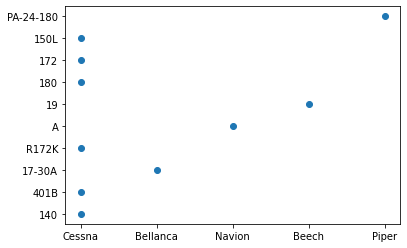

In [445]:
df =airplaneCommPrivUse_df[:10]
plt.scatter(x=df['Make'], y=df["Model"])
plt.show()

In [457]:
[df['Make'].value_counts()]

[Cessna      6
 Piper       1
 Navion      1
 Bellanca    1
 Beech       1
 Name: Make, dtype: int64]

In [461]:
df['Make'].unique()

array(['Cessna', 'Bellanca', 'Navion', 'Beech', 'Piper'], dtype=object)

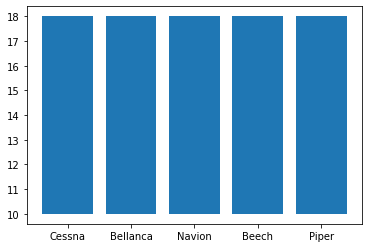

In [464]:
df =airplaneCommPrivUse_df[:10]
plt.bar(x=df['Make'], y=len(df["Model"]), height=8)
plt.show()
#df['Make'].value_counts()

In [428]:
df3 = airplaneCommPrivUse_df.dropna()
len(df3)
df3.isna().sum()

EventDate               0
Location                0
Country                 0
Latitude                0
Longitude               0
InjurySeverity          0
Aircraftdamage          0
AircraftCategory        0
RegistrationNumber      0
Make                    0
Model                   0
AmateurBuilt            0
NumberofEngines         0
EngineType              0
FARDescription          0
Purposeofflight         0
TotalFatalInjuries      0
TotalSeriousInjuries    0
TotalMinorInjuries      0
TotalUninjured          0
WeatherCondition        0
Broadphaseofflight      0
dtype: int64